# Simulation Final Assignment - Tanks met Zoutoplossing

<b>Student:</b> Justin Klein<br>
<b>Nummer:</b> 1707815<br>
<b>Klas:</b> V2B


## De opdracht
Twee grote tanks, elk gevuld met 100 Liter vloeistof, zijn met pijpleidingen aan elkaar verbonden. De vloeistof stroomt van tank A in tank B met een snelheid van 3 L/min en van B in A met 1 L/min. Een zoutoplossing met een concentratie van 0.2 kg/L stroomt met een snelheid van 6 L/min tank A in. De oplossing stroomt met een snelheid van 4 L/min tank A uit en verlaat met een snelheid van 2 L/min tank B. 

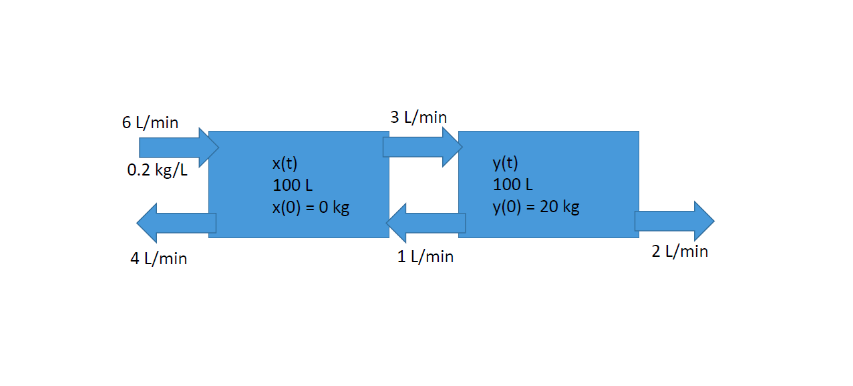

- Stel de differentiaalvergelijkingen op om deze situatie te kunnen modelleren (laat je inspireren door de eerdere opdrachten over S(E)IR en de zouttank).
- Maak een numerieke berekening van het verloop van de zoutconcentraties in tanks A en B. Gebruik in eerste instantie Forward Euler Methode, daarna kan je die uitbreiden naar een accuratere methode (voor een hoger cijfer!).
- Plot x(t) en y(t), het verloop in de tijd van de zoutconcentraties. 


## Wiskundige uitwerking
Voor deze opdracht heb ik de onderstaande vergelijkingen/methodes uitgewerkt. Ik heb gekozen voor Heun's methode als tweede methode, omdat ik denk dat deze methode een nieuw en (mogelijk) meer nauwkeurig beeld zal scheppen van de zoutconcentratie binnen de tanks.

### Differentiaalvergelijkingen tanks
- Tank X ---> X'(t) = 0,2 * 6 - (x(t) / 100) * 7 + y(t) / 100<br>
- Tank y ---> y'(t) = (x(t) / 100) * 3 + (y(t) / 100) * 3

### Euler's Method
- Tank X ---> X(t) = X(t) + h * (0,2 * 6 - (x(t) / 100) * 7 + y(t) / 100)<br>
- Tank y ---> y(t) = y(t) + h * ((x(t) / 100) * 3 + (y(t) / 100) * 3)

### Heun's Method
- Tank X ---> X(t) = X(t) + (h/2) * ((0,2 * 6 - (x(t) / 100) * 7 + y(t) / 100)) + ((0,2 * 6 - (x(t+1) / 100) * 7 + y(t+1) / 100))<br>
- Tank y ---> y(t) = y(t) + (h/2) * (((x(t) / 100) * 3 + (y(t) / 100) * 3)) + ((x(t+1) / 100) * 3 + (y(t+1) / 100) * 3))

## Codeuitwerking (en Nummerieke uitwerking)
Hier gaan we daadwerkelijk de bovenstaande methodes uitwerken. <br>Eerst importeren we de libraries en definen we in welke tijdseenheid we de stappen willen zetten. Vervolgens maken we de functie die de uitkomst van de methodes kan plotten.

In [1]:
import numpy
import matplotlib.pyplot

h = 1
num_steps = 240
times = h * numpy.array(range(num_steps + 1))

In [2]:
def plotIt():
    x_plot = matplotlib.pyplot.plot(times, X, label='X')
    y_plot = matplotlib.pyplot.plot(times, Y, label='Y')
    matplotlib.pyplot.legend(('Tank X', 'Tank Y'), loc='upper right')

    axes = matplotlib.pyplot.gca()
    axes.set_xlabel('Tijd in minuten')
    axes.set_ylabel('Zoutconcentratie')
    matplotlib.pyplot.xlim(xmin=0.)
    matplotlib.pyplot.ylim(ymin=0.)
    matplotlib.pyplot.show()

### Uitwerking met Euler's Method

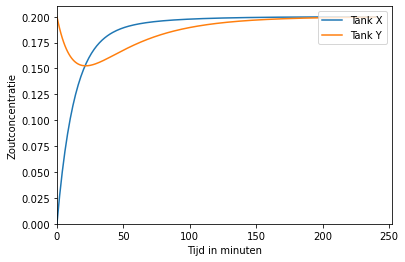

================ EULER'S METHOD | NUMMERIEKE OPLOSSING (ZOUTCONCENTRATIE) ================
Tank X:
[0.         0.014      0.02696    0.0389588  0.05006919 0.06035842
 0.0698886  0.07871712 0.08689698 0.09447717 0.10150292 0.10801604
 0.11405515 0.11965591 0.1248513  0.12967177 0.13414546 0.13829837
 0.14215453 0.14573613 0.1490637  0.15215618 0.15503111 0.15770466
 0.16019179 0.16250635 0.1646611  0.16666787 0.16853757 0.1702803
 0.17190539 0.17342146 0.1748365  0.17615788 0.17739241 0.1785464
 0.17962569 0.18063567 0.18158132 0.18246727 0.18329777 0.18407678
 0.18480795 0.18549467 0.18614006 0.18674703 0.18731824 0.18785619
 0.18836317 0.18884131 0.18929258 0.18971882 0.1901217  0.1905028
 0.19086357 0.19120536 0.19152941 0.19183689 0.19212887 0.19240635
 0.19267024 0.19292142 0.19316067 0.19338873 0.19360631 0.19381402
 0.19401247 0.19420221 0.19438376 0.19455758 0.19472414 0.19488383
 0.19503705 0.19518416 0.19532549 0.19546136 0.19559205 0.19571784
 0.19583899 0.19595573 0.19606829

In [3]:
def tank_forward_euler():
    tX = numpy.zeros(num_steps + 1)
    tY = numpy.zeros(num_steps + 1)
    tY[0] = 20
    
    for stap in range(num_steps):
        tX[stap + 1] = tX[stap] + h * ((0.2 * 6) - ((tX[stap] / 100) * 7) + (tY[stap] / 100))
        tY[stap + 1] = tY[stap] + h * (((tX[stap] / 100) * 3) - ((tY[stap] / 100) * 3))
    
    return (tX/100), (tY/100)

X, Y = tank_forward_euler()
plotIt()

print(f"================ EULER'S METHOD | NUMMERIEKE OPLOSSING (ZOUTCONCENTRATIE) ================")
print(f"Tank X:\n{X}\n")
print(f"Tank Y:\n{Y}")

### Conclusie Euler's Method
Euler's methode geeft aan dat de zoutconcentraties eerst een intersectie hebben waar ze een gelijke zoutconcentratie hebben en daarna uit elkaar gaan. Vervolgens is te zien dat de zoutconcentraties in beide tanks toch weer naar dezelfde waardes toe groeien en uiteindelijk balanceren op een waarde rond de 0.2 wat logisch is aangezien er constant water met een 0.2Kg zoutoplossing in de tanks gepompt wordt.

### Uitwerking met Heun's Method

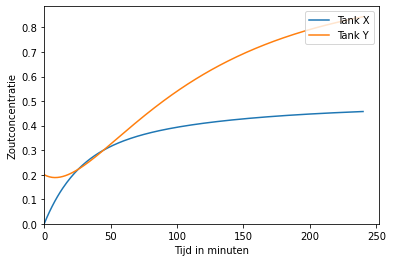

================ HEUN'S METHOD | NUMMERIEKE OPLOSSING (ZOUTCONCENTRATIE) ================
Tank X:
[0.         0.013      0.02553098 0.03761147 0.04925926 0.06049144
 0.07132438 0.0817738  0.09185479 0.10158182 0.11096878 0.120029
 0.12877528 0.13721989 0.14537461 0.15325075 0.16085916 0.16821025
 0.17531401 0.18218004 0.18881754 0.19523535 0.20144194 0.20744545
 0.2132537  0.21887417 0.22431408 0.22958032 0.23467953 0.23961806
 0.24440203 0.24903731 0.25352952 0.25788407 0.26210614 0.26620072
 0.27017259 0.27402634 0.27776637 0.28139693 0.28492206 0.28834568
 0.29167153 0.29490321 0.29804416 0.30109772 0.30406706 0.30695525
 0.30976522 0.31249979 0.31516168 0.31775348 0.3202777  0.32273675
 0.32513292 0.32746844 0.32974543 0.33196594 0.33413194 0.33624531
 0.33830787 0.34032137 0.34228748 0.34420781 0.34608391 0.34791727
 0.34970931 0.35146142 0.35317492 0.35485107 0.3564911  0.35809618
 0.35966744 0.36120597 0.36271281 0.36418898 0.36563542 0.36705309
 0.36844286 0.3698056  0.37114215

In [4]:
def tank_heuns():
    tX = numpy.zeros(num_steps + 1)
    tY = numpy.zeros(num_steps + 1)
    tY[0] = 20
    
    for stap in range(num_steps):
        tX[stap + 1] = tX[stap] + (h/2) * ((0.2 * 6) - ((tX[stap] / 100) * 7) + (tY[stap] / 100) + \
                                           (0.2 * 6) - ((tX[stap + 1] / 100) * 7) + (tY[stap + 1] / 100))
        
        tY[stap + 1] = tY[stap] + (h/2) * ((((tX[stap] / 100) * 3) - ((tY[stap] / 100) * 3)) + \
                                          (((tX[stap + 1] / 100) * 3) - ((tY[stap + 1] / 100) * 3)))
    
    return (tX/100), (tY/100)

X, Y = tank_heuns()
plotIt()

print(f"================ HEUN'S METHOD | NUMMERIEKE OPLOSSING (ZOUTCONCENTRATIE) ================")
print(f"Tank X:\n{X}\n")
print(f"Tank Y:\n{Y}")


### Conclusie Heun's Method
Heun's methode geeft dus een heel ander beeld van de zoutconcentratie. In plaats van dat de tanks naar elkaar toe groeien doen ze dit in de eerste instantie en gaat de hoeveelheid zoutconcentratie vervolgens steeds verder uit elkaar. Tank X blijft dus meteen al steeds meer gelijk maar Y neemt steeds meer toe en heeft dus meer tijd nodig om te stoppen met groeien. De twee tanks lijken echter nooit een even grote hoeveelheid zoutconcentratie te krijgen.
<br>Tank Y heeft dus ongeveer de dubbele hoeveelheid zoutconcentratie als Tank X.

## Algemene conclusie
Euler's methode lijkt mij meer logisch aangezien er constant water met een 0.2Kg zoutoplossing in de tanks gepompt wordt. Uit de berekening blijkt dus ook dat de waardes de 0.2 benaderen. Dit lijkt te kloppen, want aangezien 1Kg hetzelfde is als 1 Liter dan is 20Kg zout in een tank van 100L dus 0.2 (oftewel 20% zoutconcentratie).
<br><br>
Heun's Methode lijkt ook in zekere zin te kloppen maar de zoutoplossingwaardes zijn wel heel hoog wat mij niet zo logisch lijkt aangezien er ook water <b>uit</b> de tanks loopt. Echter kan dit te maken hebben dat er 6L water in de tanks stroomt per minuut wat een impact kan hebben op deze waardes.
Kortom, we weten uiteraard niet de daadwerkelijke waardes dus kunnen we pas echt zeggen welke methode correct is in dit geval als dat is gemeten.